# From tensorflow tutorial for beginners on their website

In [31]:
# Doing tensorflow with keras, doing image classification on the fashion MNIST
# Dataset

from __future__ import absolute_import, division, print_function, \
    unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Checking TensorFlow version
print(tf.__version__)

2.1.0


In [32]:
# Importing the Fashion MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

# Name of the classes considered in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
# Exploring the data
print(train_images.shape)
# Output: (60000, 28, 28)

print(len(train_labels))
# Output 60000

print(train_labels)
# Output: [9, 0, 0, ..., 3, 0, 5]

print(test_images.shape)
# Output: (10000, 28, 28)

print(len(test_labels))
# Output: 10000

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


# Preprocessing data
## First we plot the image to see how the data is organized

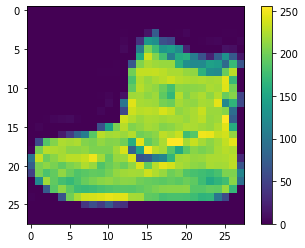

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## We will scale the images to have values between 0 and 1. Important to scale both training and test sets.


In [35]:

train_images = train_images / 255.0

test_images = test_images / 255.0


## Now we display 25 images from the training set and their classes


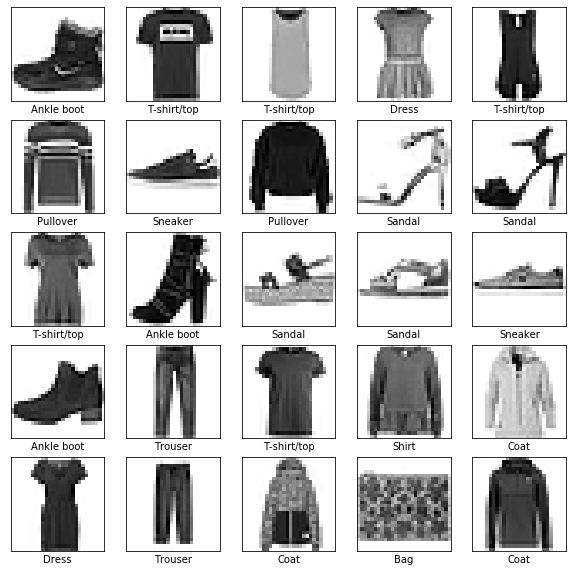

In [6]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model
### Setting up the layers of our NN

In [44]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## Flatten will transform and nD array to a 1D array. Dense are fully connected layers.

### Compiling the model

### When we compile the model, we need to add the loss function we want to optimize, the optimizer we want to use and finally the metrics we want to  consider.

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Training the model

# There are 4 steps to training model:
# 1. Feeding the training data to the model

model.fit(train_images, train_labels, epochs=10)
# The epochs represent the number of times the odel goes throught the whole
# dataset

# 2. The model learns how to match images to their labels (this is done by the
# code above)
# 3. Predicting the labels of the test set

predictions = model.predict(train_images)

print(predictions[0])
# Output: 10 numbers that should be between 0 and 1 and add up to 1

print(np.argmax(predictions[0]))
# Ouput: A number between 0 and 9 representing the position of the largest
# number in the previously printed array.

print(test_labels[0])
# Output: 9 (true class of the first test image (Ankle boot))

# 4. Check if the predicted labels match the true labels

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)





Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4796 - accuracy: 0.8294
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3627 - accuracy: 0.8677
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3257 - accuracy: 0.8793
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3028 - accuracy: 0.8883
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2856 - accuracy: 0.8936
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2709 - accuracy: 0.8996
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2566 - accuracy: 0.9043
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2472 - accuracy: 0.9072
Epoch 9/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2359 - accuracy: 0.9108
Epoch 10/10
6

In [47]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], \
        img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array): 2.0f} % ({class_names[true_label]})",
               color=color)


In [40]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## Graphing functions to plot the probability of classifying an image to each class

# Verifying our predictions using our graphical functions

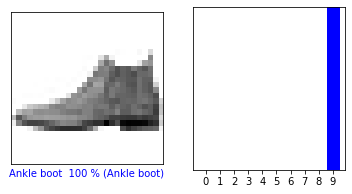

In [41]:

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


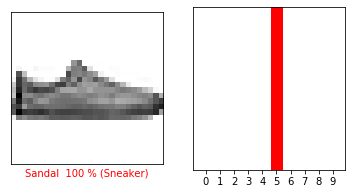

In [42]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
## Color correct predictions in blue and incorrect predictions in red.


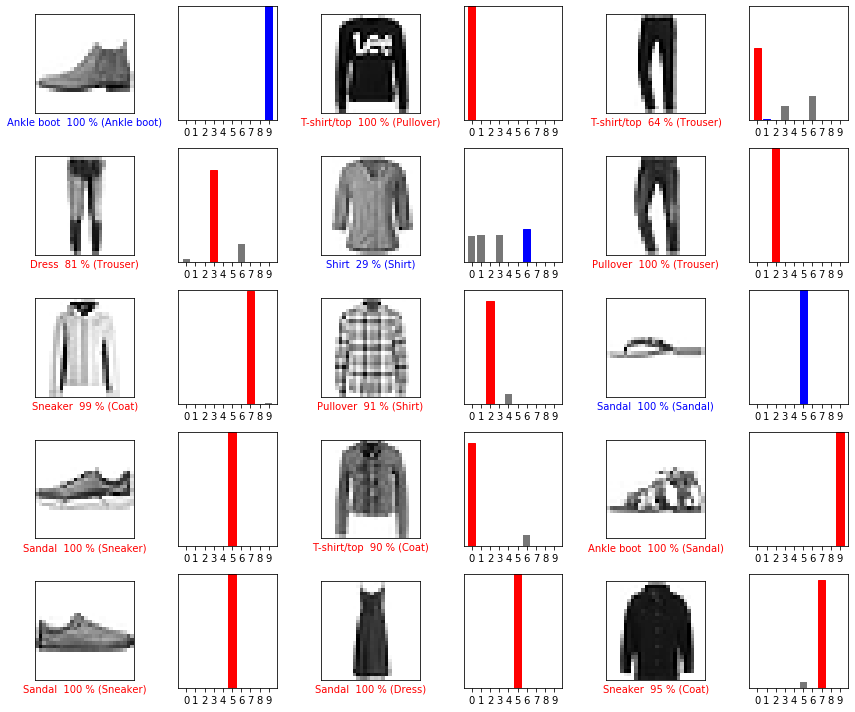

In [43]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [21]:
# Using the trained model

# Grab an image from the test dataset.

img = test_images[1]
print(img.shape)
# Output: (28, 28)

# Add the image to a batch where it's the only member

img = (np.expand_dims(img, 0))
print(img.shape)
# Output: (1, 28, 28)

# Predicting the correct label for the image

predictions_single = model.predict(img)
print(predictions_single)
# Output: An array of values between 0 and 1 that add up to 1

# Getting the prediction for the single image


(28, 28)
(1, 28, 28)
[[5.8027626e-06 2.9739969e-13 9.9878114e-01 5.7204905e-14 1.1079347e-03
  3.1471209e-10 1.0514337e-04 1.0379835e-12 3.2592167e-12 3.1586591e-15]]


In [24]:

#plt.figure()
#plot_value_array(1, predictions_single[0], test_labels)
#_ = plt.xticks(range(10), class_names, rotation=45)
#plt.show()


In [25]:

#print(np.argmax(predictions_single[0]))
# Output: The position of the maximum value in the previous array printed
